
* StudentID: C0902422
* Student Name: Brayan Leonardo Gil Guevara

* git: https://github.com/leokook/Assignment2AML3104

### Import Neccesary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Load the Fashion MNIST dataset

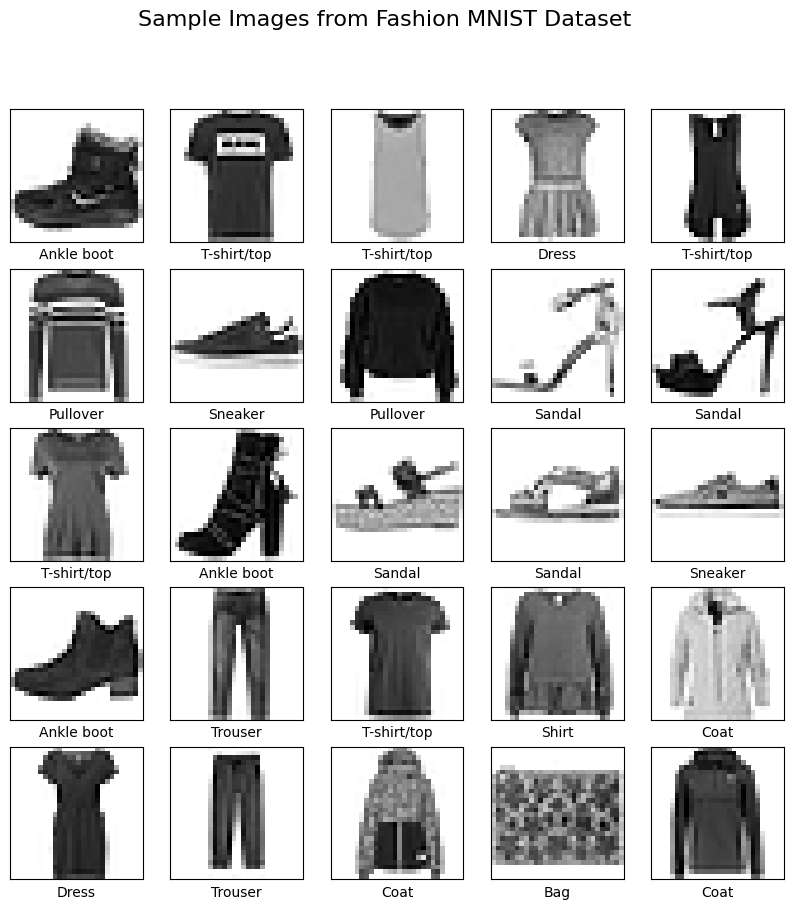

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("Sample Images from Fashion MNIST Dataset", fontsize=16)
plt.show()




Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

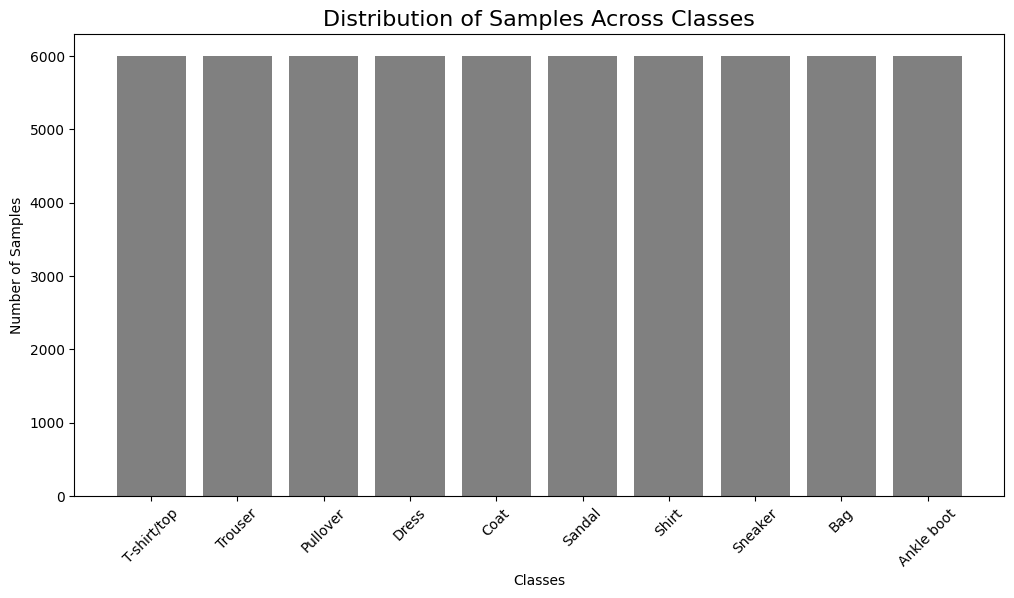

In [3]:

# Bar chart of class distribution, use color gray coolor for the bars 


unique, counts = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(12,6))
plt.bar(class_names, counts, color='gray')
plt.title('Distribution of Samples Across Classes', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

### Data Preprocessing  

In [4]:

# Preprocess the data - Normalize the pixel values to be between 0 and 1. We do this because NN perform better when input data is normalized. It also helps with faster convergence during training.
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Split the training data into training and validation sets. We will use the validation set to evaluate the model's performance after training. In validation we will have 10000 samples and in training we will have 50000 samples. 
val_images = train_images[-10000:]
val_labels = train_labels[-10000:]
train_images = train_images[:-10000]
train_labels = train_labels[:-10000]



### Different Model architectures 

In [5]:

# Define different model architectures
def create_model_1():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_2():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_3():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='tanh'),
        layers.Dense(64, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_4():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_5():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='elu'),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


*   create_model_1(): Basic architecture with ReLU activation.
*   create_model_2(): Deeper network with more layers and neurons, all using ReLU activation.
*   create_model_3(): Similar to model_1() but using Tanh activation.
*   create_model_4(): Similar to model_1() but includes Dropout layers to prevent overfitting.
*   create_model_5(): Similar to model_1() but using ELU activation.

### Compile the model

In [6]:

# Function to train and evaluate a model
def train_and_evaluate(model, name):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

We use Adam Optimizer because of its outstanding efficiency in handling large datasets. As for metrics, we use Accuracy, Precision and Recall. 

### Model Training

In [7]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

def train_and_evaluate(model, name):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', 
                           Precision(class_id=0, name='precision'),
                           Recall(class_id=0, name='recall')])
    
    history = model.fit(train_images, train_labels, epochs=15, 
                        validation_data=(val_images, val_labels), verbose=1)
    
    test_loss, test_acc, test_precision, test_recall = model.evaluate(test_images, test_labels, verbose=0)
    
    return history, test_acc, test_precision, test_recall

results = []

We here are using a function to compile our models with its metrics, then we train them and evaluate by using the validation dataset. We are using history and store the results[] to compare later the results. 

### Model Evaluation

In [9]:
models = [
    ("Model 1 (2 ReLU layers)", create_model_1),
    ("Model 2 (3 ReLU layers)", create_model_2),
    ("Model 3 (2 Tanh layers)", create_model_3),
    ("Model 4 (2 ReLU layers with Dropout)", create_model_4),
    ("Model 5 (2 ELU layers)", create_model_5)
]

Training Model 1 (2 ReLU layers)...


C:\Users\leoko\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7700 - loss: 0.6569 - precision: 0.8768 - recall: 0.0801 - val_accuracy: 0.8501 - val_loss: 0.4301 - val_precision: 0.9045 - val_recall: 0.0770
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8601 - loss: 0.3906 - precision: 0.8672 - recall: 0.0861 - val_accuracy: 0.8596 - val_loss: 0.3800 - val_precision: 0.9001 - val_recall: 0.1044
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8755 - loss: 0.3417 - precision: 0.8804 - recall: 0.0928 - val_accuracy: 0.8708 - val_loss: 0.3533 - val_precision: 0.9019 - val_recall: 0.0850
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8828 - loss: 0.3156 - precision: 0.8633 - recall: 0.0940 - val_accuracy: 0.8817 - val_loss: 0.3334 - val_precision: 0.8968 - val_recall: 0.0939
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8907 - loss: 0.2938 - precision: 0.8725 - recall: 0.0923 - val_accuracy: 0.8712

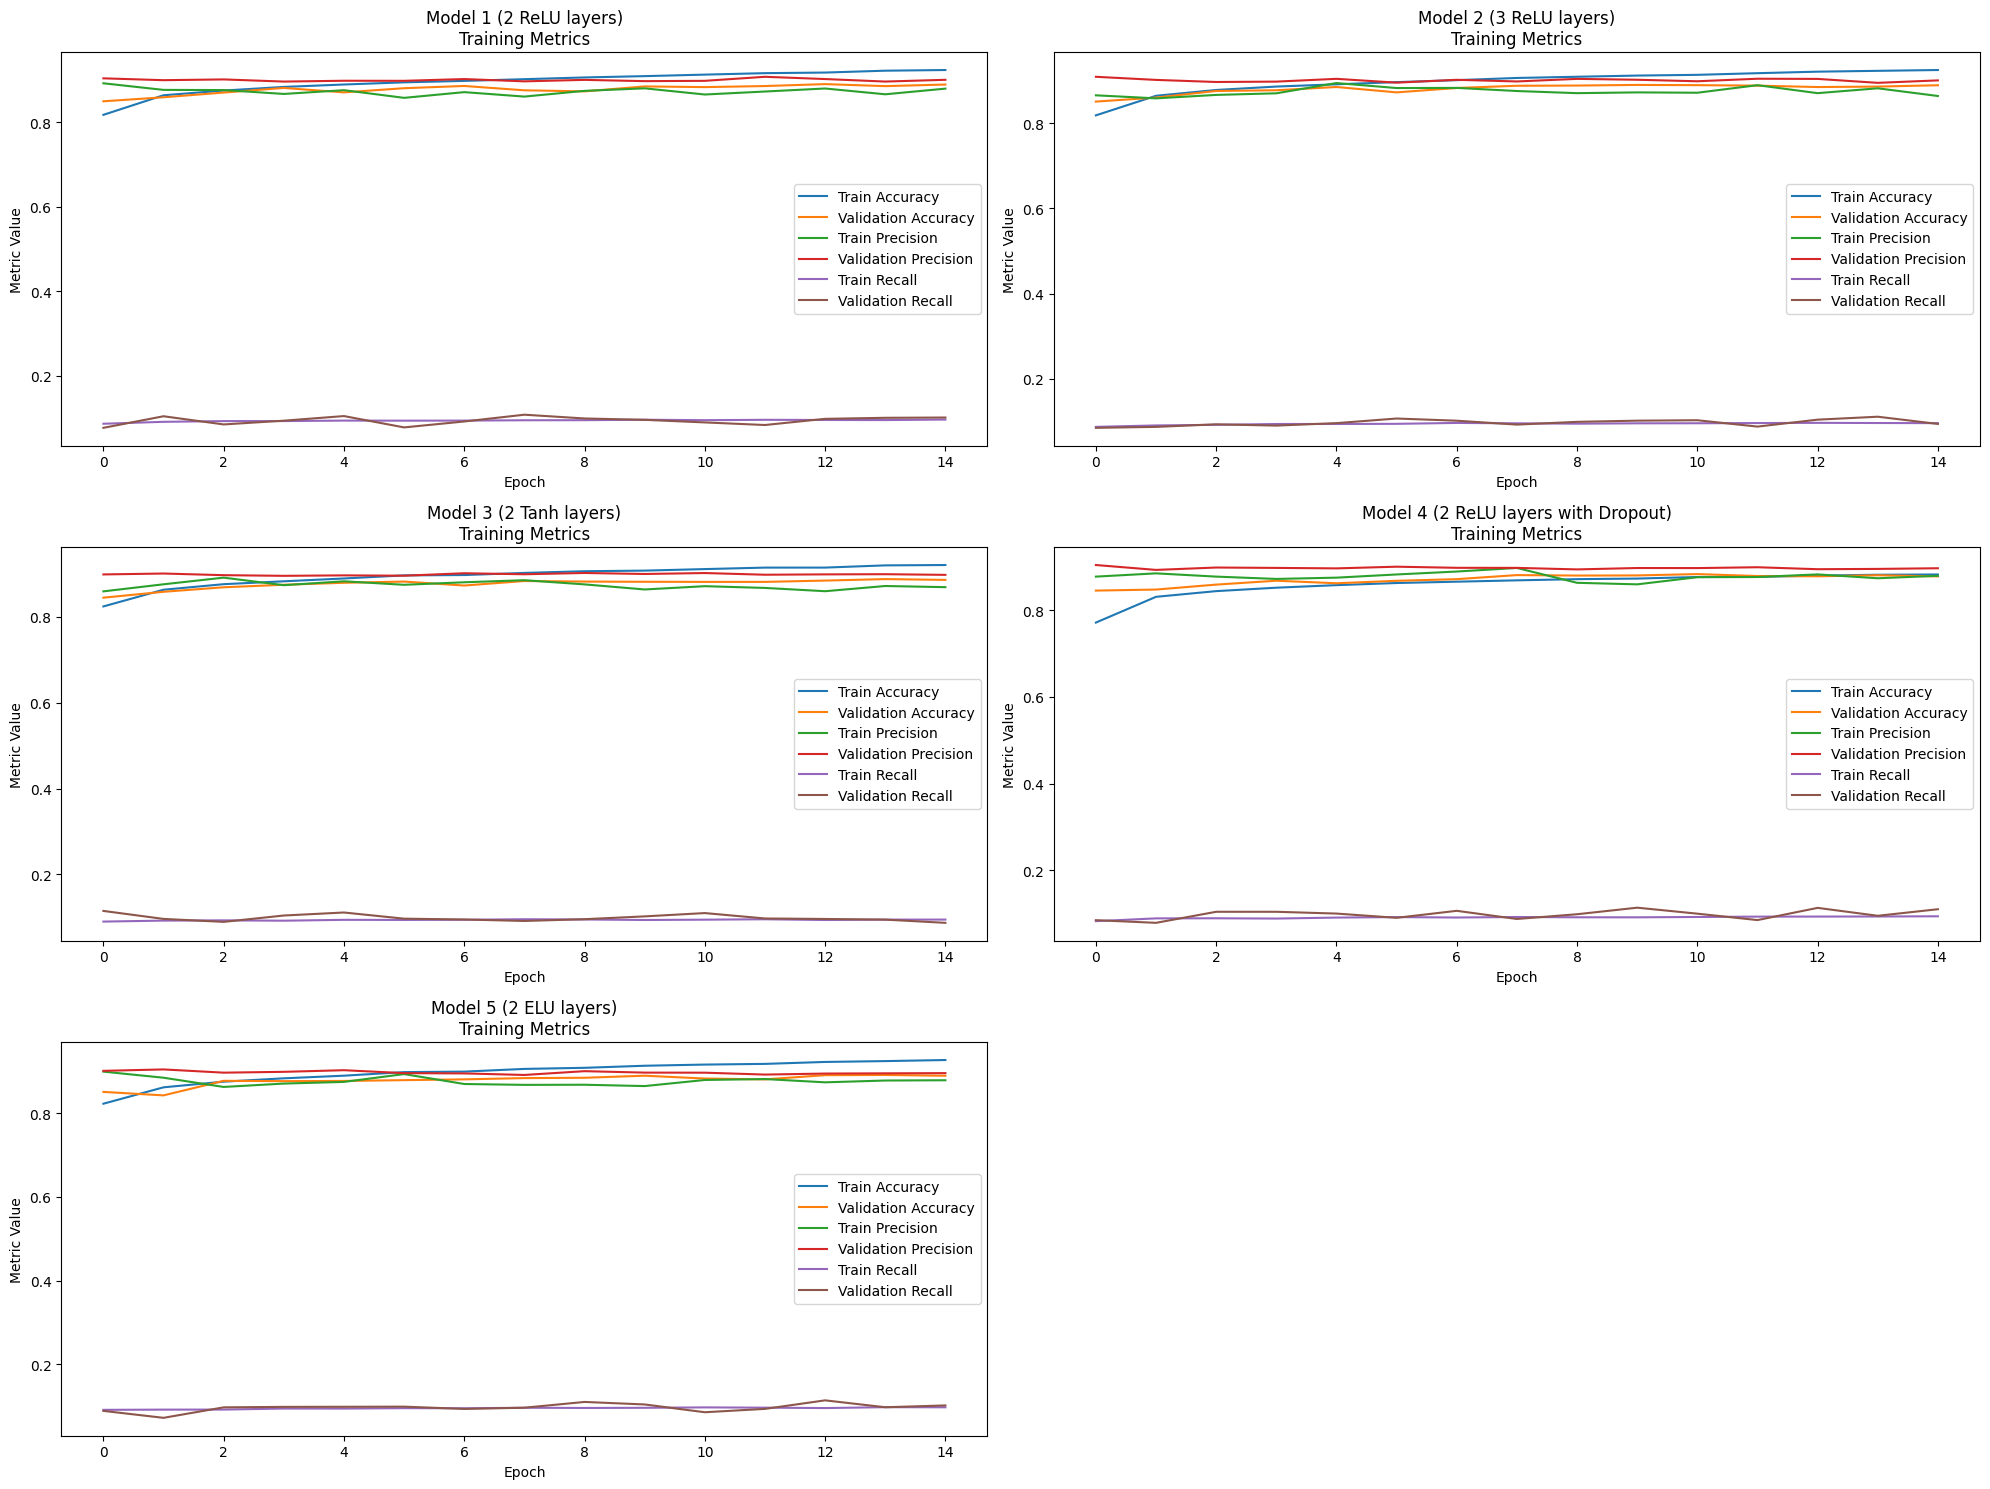

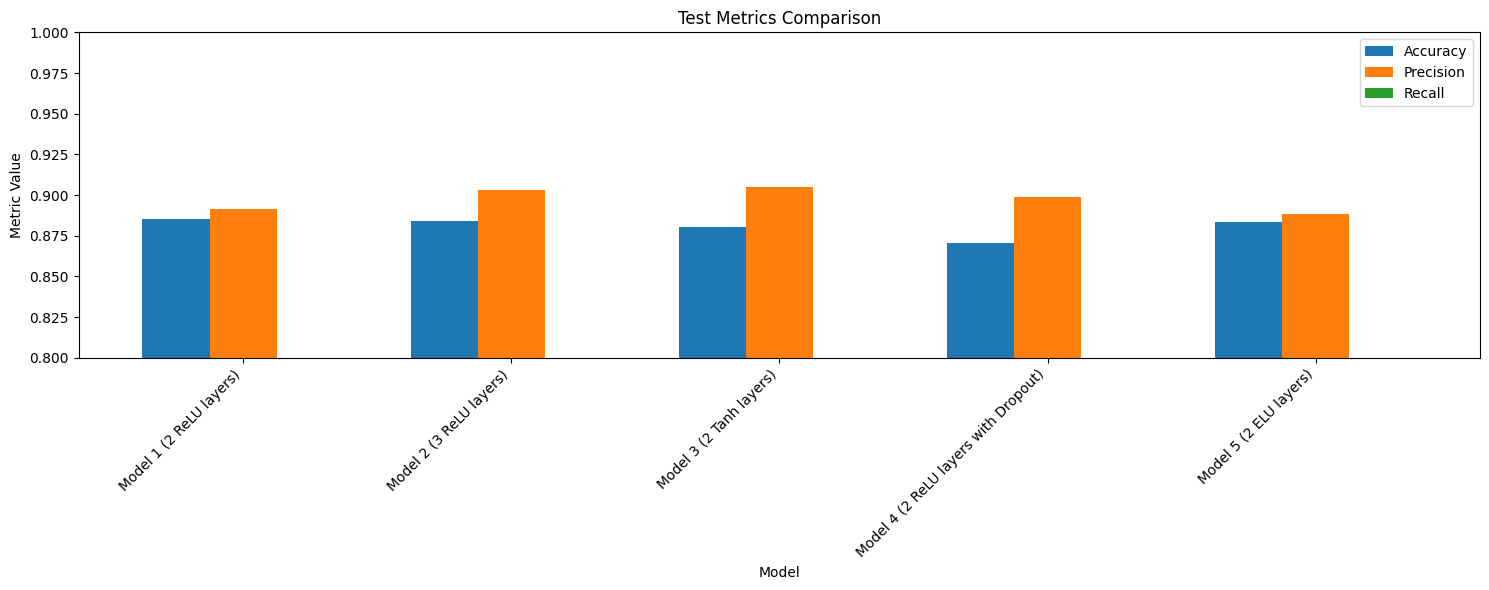

,Model,History,Accuracy,Precision,Recall
0,Model 1 (2 ReLU layers),<keras.src.callbacks.history.History object at...,0.8852,0.891150,0.095884
1,Model 2 (3 ReLU layers),<keras.src.callbacks.history.History object at...,0.8838,0.903294,0.093039
2,Model 3 (2 Tanh layers),<keras.src.callbacks.history.History object at...,0.8801,0.904762,0.083187
3,Model 4 (2 ReLU layers with Dropout),<keras.src.callbacks.history.History object at...,0.8704,0.898793,0.105954
4,Model 5 (2 ELU layers),<keras.src.callbacks.history.History object at...,0.8835,0.888450,0.098511


In [10]:
for name, model_func in models:
    print(f"Training {name}...")
    model = model_func()
    try:
        history, test_acc, test_precision, test_recall = train_and_evaluate(model, name)
        results.append((name, history, test_acc, test_precision, test_recall))
        print(f"{name} - Test accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
    except Exception as e:
        print(f"Error occurred while training {name}: {str(e)}")
        continue

# Plotting the results
plt.figure(figsize=(20, 15))

for i, (name, history, _, _, _) in enumerate(results):
    plt.subplot(3, 2, i+1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    if 'precision' in history.history:
        plt.plot(history.history['precision'], label='Train Precision')
        plt.plot(history.history['val_precision'], label='Validation Precision')
    if 'recall' in history.history:
        plt.plot(history.history['recall'], label='Train Recall')
        plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title(f'{name}\nTraining Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()

plt.tight_layout()
plt.show()

# Bar plot of test metrics
names = [r[0] for r in results]
test_accs = [r[2] for r in results]
test_precisions = [r[3] for r in results]
test_recalls = [r[4] for r in results]

plt.figure(figsize=(15, 6))
x = np.arange(len(names))
width = 0.25

plt.bar(x - width, test_accs, width, label='Accuracy')
plt.bar(x, test_precisions, width, label='Precision')
plt.bar(x + width, test_recalls, width, label='Recall')

plt.title('Test Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.ylim(0.8, 1.0)  # Adjust as needed
plt.xticks(x, names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show() 

#Display accuracy values in a table
import pandas as pd

results_df = pd.DataFrame(results, columns=['Model', 'History', 'Accuracy', 'Precision', 'Recall'])
results_df


* The above  code help us to train an evaluate all the models. 
* We also plot training metrics over each epoch and compare those metrics for all models. 
* We also display a table summarizing the metrics for easier comparison. 

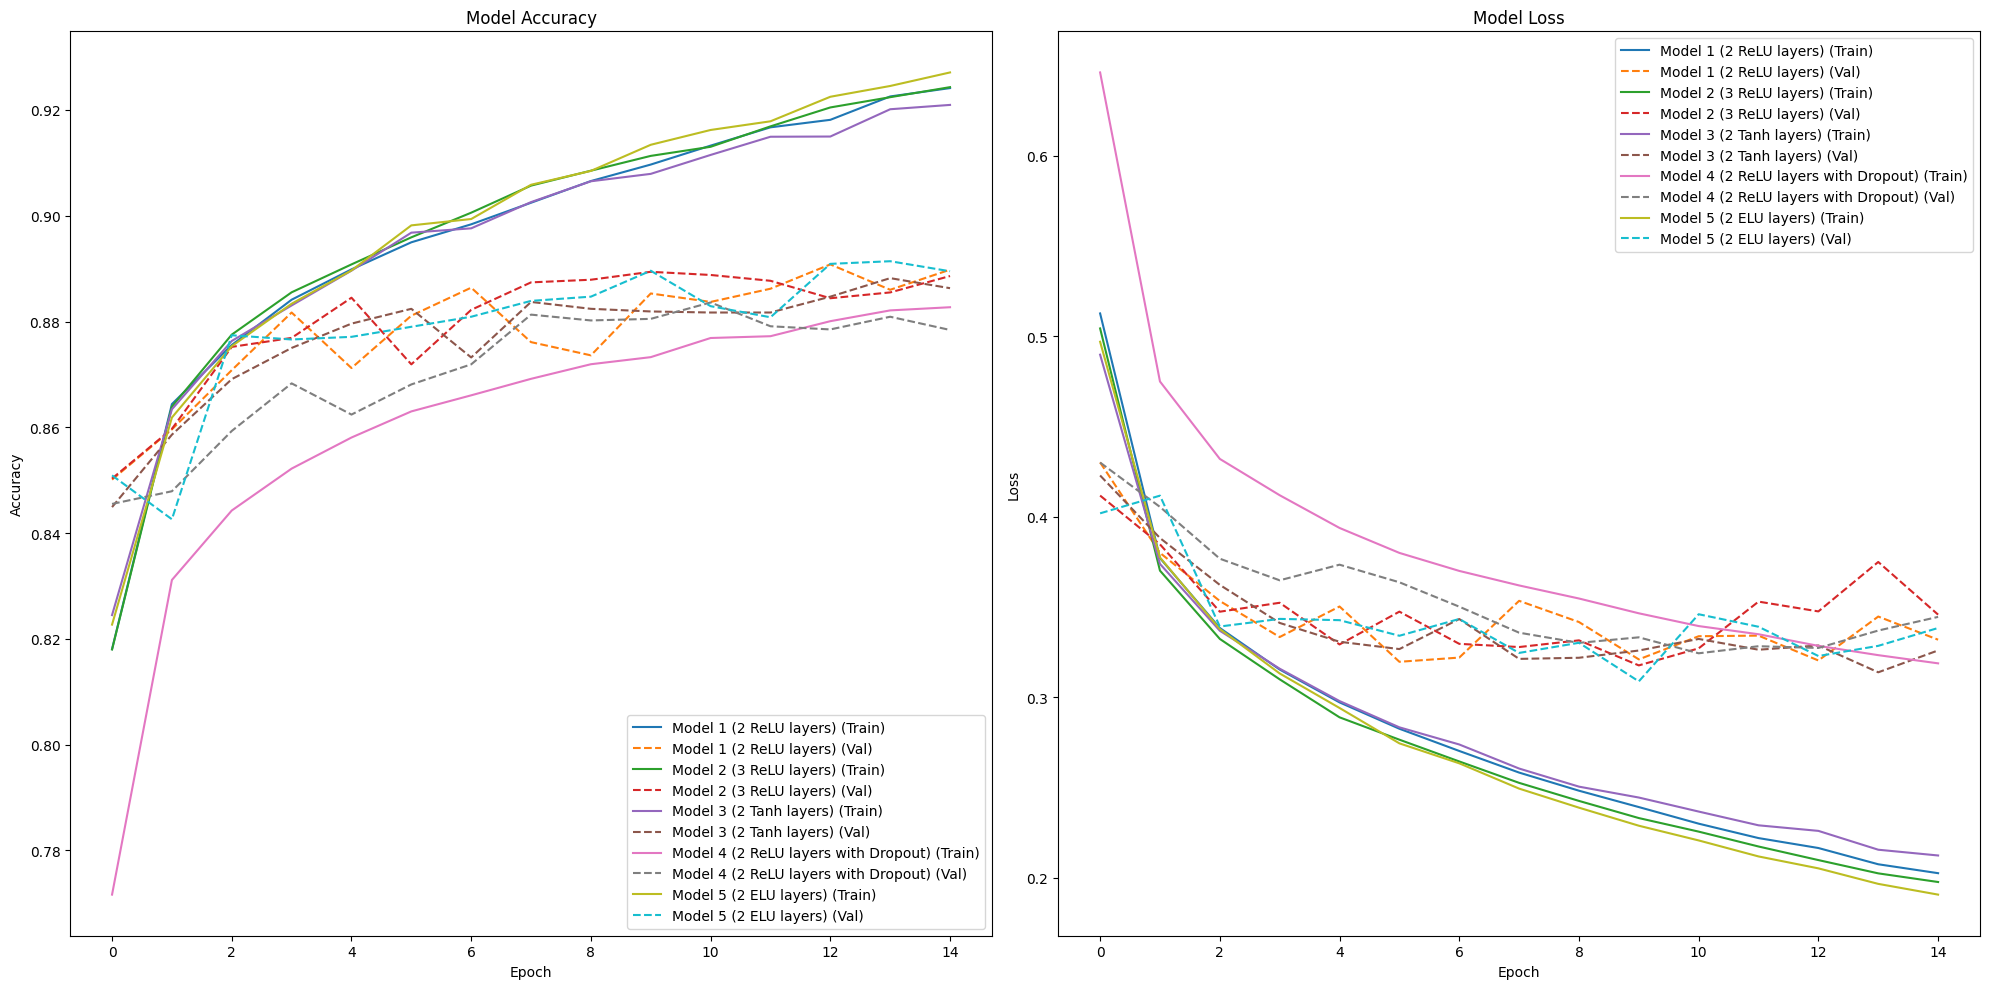

In [12]:
# Plot  training and validation loss and accuracy for all the models in a single plot
plt.figure(figsize=(20, 10))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
for name, history, _, _, _ in results:
    plt.plot(history.history['accuracy'], label=f'{name} (Train)')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{name} (Val)')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2)
for name, history, _, _, _ in results:
    plt.plot(history.history['loss'], label=f'{name} (Train)')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{name} (Val)')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Here we visualize the training process using training loss and accuracy. We do the same also for  validation

#### Finding the best model

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Find the best model based on test accuracy
best_result = max(results, key=lambda x: x[2])
best_model_name, best_history, best_acc, best_precision, best_recall = best_result

# Recreate the best model (since we didn't keep the trained model objects)
best_model_func = next(func for name, func in models if name == best_model_name)
best_model = best_model_func()
best_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
best_model.fit(train_images, train_labels, epochs=15, verbose=0)  # Retrain the best model


C:\Users\leoko\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


By using the best_result we compare the accuracy of all previous models and then compare the results, keeping only the max(accuracy). 

### Testing the best model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


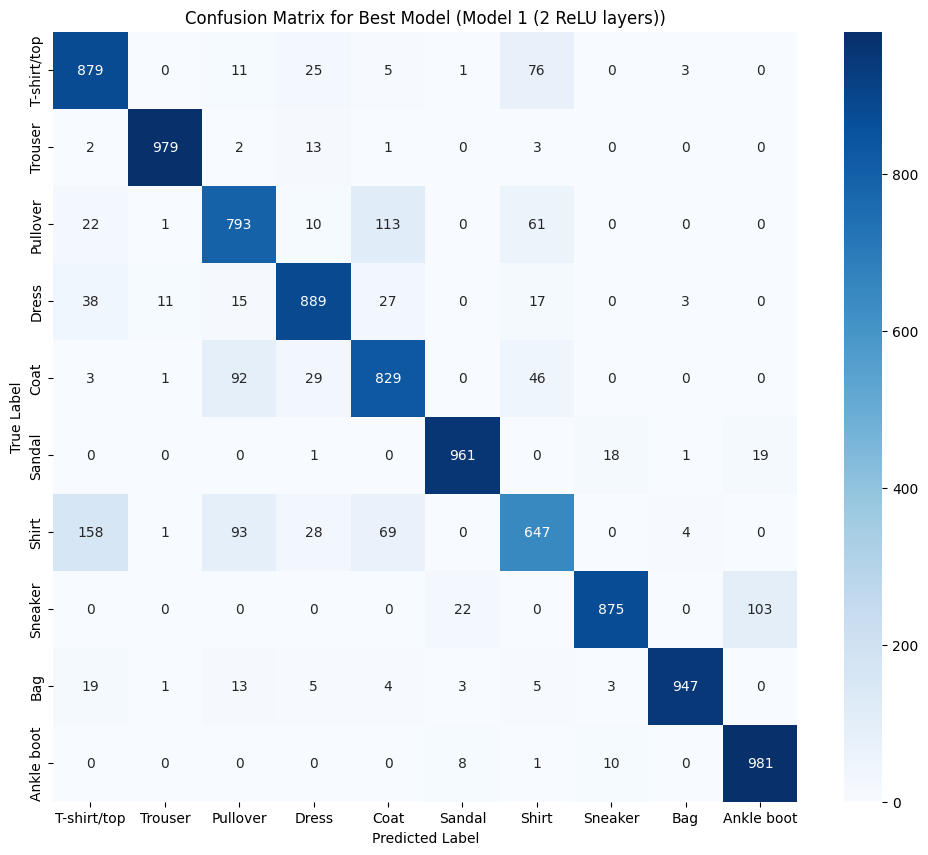

In [15]:

# Generate predictions
y_pred = best_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix for Best Model ({best_model_name})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [16]:
# Print classification report
print("Classification Report for Best Model:")
print(classification_report(test_labels, y_pred_classes, target_names=class_names))



Classification Report for Best Model:
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.88      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.78      0.79      0.79      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.79      0.83      0.81      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.76      0.65      0.70      1000
     Sneaker       0.97      0.88      0.92      1000
         Bag       0.99      0.95      0.97      1000
  Ankle boot       0.89      0.98      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



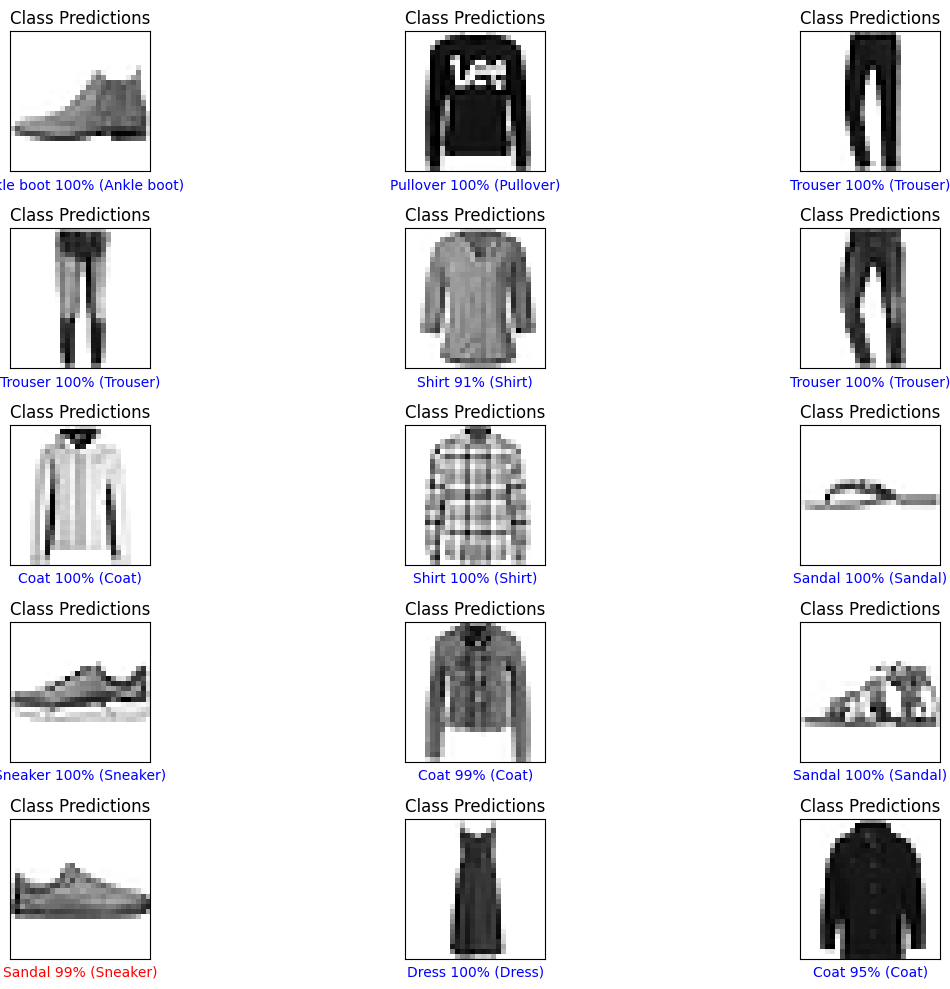

In [17]:
# Visualize some predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.title("Class Predictions")
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_pred, test_labels, test_images)
plt.tight_layout()
plt.show()

* Generate Predictions: Obtains predicted class labels from the best model.
* Confusion Matrix: Creates and plots a confusion matrix to visualize prediction accuracy per class.
* Classification Report: Prints detailed classification metrics for each class.
* Visualize Predictions: Plots a subset of test images with predicted and true labels, highlighting correct and incorrect predictions.